<a href="https://colab.research.google.com/github/devivinariana/Wether_LSTM/blob/main/LSTM_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
files.upload()

Saving dataset_clean.xlsx to dataset_clean.xlsx


{'dataset_clean.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00N:{WFZ\xc1\x0c\x82\x00\x00\x00\xb1\x00\x00\x00\x10\x00\x00\x00docProps/app.xmlM\x8eM\x0b\xc20\x10D\xffJ\xe9\xddnU\xf0 1 \xd4\xa3\xe0\xc9{H76\x90dCv\x85\xfc|S\xc1\x8f\xdb<\xde0\x8c\xba\x15\xcaX\xc4#w5\x86\xc4\xa7~\x11\xc9G\x00\xb6\x0bF\xc3C\xd3\xa9\x19G%\x1aiX\x1e@\xcey\x8b\x13\xd9g\xc4$\xb0\x1b\xc7\x03`\x15L3\xce\x9b\xfc\x1d\xec\xb5:\xe7\x1c\xbc5\xe2)\xe9\xab\xb7\x85\x98\x9ct\x97j1(\xf8\x97k\xf3\x8e\x85\xd7\xbc\x1f\xb6o\xf9a\x05\xbf\x93\xfa\x05PK\x03\x04\x14\x00\x00\x00\x08\x00N:{WU\x1d(\x99\xef\x00\x00\x00+\x02\x00\x00\x11\x00\x00\x00docProps/core.xml\xcd\x92\xc1j\xc30\x0c\x86_e\xf8\x9e(N`-&\xf5e\xa5\xa7\r\x06+l\xecfl\xb55\x8bcck$}\xfb%^\x9b2\xb6\x07\xd8\xd1\xd2\xefO\x9f@\xad\x0eB\xfb\x88\xcf\xd1\x07\x8cd1\xdd\x8d\xae\xeb\x93\xd0a\xc3NDA\x00$}B\xa7R9%\xfa\xa9y\xf0\xd1)\x9a\x9e\xf1\x08A\xe9\x0fuD\xa8\xab\xea\x1e\x1c\x922\x8a\x14\xcc\xc0",D&[\xa3\x85\x8e\xa8\xc8\xc7\x0b\xde\xe8\x05\x1f>c\x97aF\x03v\xe8\xb0\xa7\x04\xbc\xe4\xc0\xe

In [ ]:
excel_file = pd.read_excel('dataset_clean.xlsx')

In [ ]:
df = pd.DataFrame(excel_file)
print(df)

         Tanggal    Tn    Tx  Tavg  RH_avg       RR   ss
0     31-12-2015  26.0  31.6  28.7    80.0  8888.00  8.2
1     01-01-2016  25.4  32.0  29.3    77.0  4444.25  6.5
2     02-01-2016  26.2  31.6  28.1    86.0     0.50  5.8
3     03-01-2016  27.0  32.0  28.3    86.0    38.50  2.0
4     04-01-2016  23.2  32.3  27.8    84.0    76.50  4.7
...          ...   ...   ...   ...     ...      ...  ...
2876  15-11-2023  27.0  35.6  31.0    70.0     0.00  6.7
2877  16-11-2023  27.0  35.6  31.0    70.0     0.00  6.7
2878  17-11-2023  27.0  35.6  31.0    70.0     0.00  6.7
2879  18-11-2023  27.0  35.6  31.0    70.0     0.00  6.7
2880  19-11-2023  27.0  35.6  31.0    70.0     0.00  6.7

[2881 rows x 7 columns]


In [ ]:
# memisahkan fitur input dan output
# kita dapat memilih ingin menggunakan featur yang mana, bisa Tn, Tx, Tavg, bisa semuanya
# hal sama berlaku pada outpunya

input_features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss']
output_features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss']

In [ ]:
# x mengambil data pada df yang fiturnya ada di input_features
# y mengambil data pada df yang fiturnya ada di output_features
x = df[input_features].values
y = df[output_features].values

In [ ]:
print(x)

[[2.60000e+01 3.16000e+01 2.87000e+01 8.00000e+01 8.88800e+03 8.20000e+00]
 [2.54000e+01 3.20000e+01 2.93000e+01 7.70000e+01 4.44425e+03 6.50000e+00]
 [2.62000e+01 3.16000e+01 2.81000e+01 8.60000e+01 5.00000e-01 5.80000e+00]
 ...
 [2.70000e+01 3.56000e+01 3.10000e+01 7.00000e+01 0.00000e+00 6.70000e+00]
 [2.70000e+01 3.56000e+01 3.10000e+01 7.00000e+01 0.00000e+00 6.70000e+00]
 [2.70000e+01 3.56000e+01 3.10000e+01 7.00000e+01 0.00000e+00 6.70000e+00]]


In [ ]:
print(y)

[[2.60000e+01 3.16000e+01 2.87000e+01 8.00000e+01 8.88800e+03 8.20000e+00]
 [2.54000e+01 3.20000e+01 2.93000e+01 7.70000e+01 4.44425e+03 6.50000e+00]
 [2.62000e+01 3.16000e+01 2.81000e+01 8.60000e+01 5.00000e-01 5.80000e+00]
 ...
 [2.70000e+01 3.56000e+01 3.10000e+01 7.00000e+01 0.00000e+00 6.70000e+00]
 [2.70000e+01 3.56000e+01 3.10000e+01 7.00000e+01 0.00000e+00 6.70000e+00]
 [2.70000e+01 3.56000e+01 3.10000e+01 7.00000e+01 0.00000e+00 6.70000e+00]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# normalisasi supaya skalanya konsisten 0-1
# inisialisasi dulu
scaler = MinMaxScaler()

# x_scaled dan y_scaled ini adalah hasil tranformasi
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

In [ ]:
print(x_scaled)

[[7.80000000e-01 7.82122905e-01 6.86440678e-01 7.14285714e-01
  1.00000000e+00 5.29032258e-01]
 [7.20000000e-01 7.93296089e-01 7.37288136e-01 6.60714286e-01
  5.00028128e-01 4.19354839e-01]
 [8.00000000e-01 7.82122905e-01 6.35593220e-01 8.21428571e-01
  5.62556256e-05 3.74193548e-01]
 ...
 [8.80000000e-01 8.93854749e-01 8.81355932e-01 5.35714286e-01
  0.00000000e+00 4.32258065e-01]
 [8.80000000e-01 8.93854749e-01 8.81355932e-01 5.35714286e-01
  0.00000000e+00 4.32258065e-01]
 [8.80000000e-01 8.93854749e-01 8.81355932e-01 5.35714286e-01
  0.00000000e+00 4.32258065e-01]]


In [ ]:
print(y_scaled)

[[7.80000000e-01 7.82122905e-01 6.86440678e-01 7.14285714e-01
  1.00000000e+00 5.29032258e-01]
 [7.20000000e-01 7.93296089e-01 7.37288136e-01 6.60714286e-01
  5.00028128e-01 4.19354839e-01]
 [8.00000000e-01 7.82122905e-01 6.35593220e-01 8.21428571e-01
  5.62556256e-05 3.74193548e-01]
 ...
 [8.80000000e-01 8.93854749e-01 8.81355932e-01 5.35714286e-01
  0.00000000e+00 4.32258065e-01]
 [8.80000000e-01 8.93854749e-01 8.81355932e-01 5.35714286e-01
  0.00000000e+00 4.32258065e-01]
 [8.80000000e-01 8.93854749e-01 8.81355932e-01 5.35714286e-01
  0.00000000e+00 4.32258065e-01]]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Pemisahan data uji, data latih

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size = 0.2, shuffle=False)
# size disini sebagai berapa banyak data yang akan kita gunakan sebagai data testing
# 0.2 artinya 20% data akan digunakan sebagai data uji dan 80% sebagai data latih
# karena kita menggunakan data time series, maka harus ditambahakan shuffle sbg mencegah terjadinya pengacakan data
# saat kita membagi data menjadi data uji dan data latih, urutannya tidak akan teracak


In [ ]:
# timesteps ini adalah panjangnya rentang waktu yang akan digunakan input model LSTM
timesteps = 30
# menggunakan data 30 hari sebelumnya menjadi input LSTM

n_features_input = len(input_features)
n_features_output = len(output_features)

In [ ]:
# mendefinisikan fungsi
def create_sequences(x, y, time_steps) :
  x_seq, y_seq = [], []

# sebelum mengembalikan nilai para seq, kita akan melakukan iterasi
  for i in range(len(x)-time_steps) : #pengurangan dg timesteps krn data paling terakhir tidak akan bisa di proses
    x_seq.append(x[i : i + time_steps])
    y_seq.append(y[i + time_steps ])

  return np.array(x_seq), np.array(y_seq)

In [ ]:
x_train_seq, y_train_seq = create_sequences(x_train, y_train, timesteps)

# test data
x_test_seq, y_test_seq = create_sequences(x_test, y_test, timesteps)

In [ ]:
# MODEL LSTM4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()

# layer1, jml unit 60,
model.add(LSTM(60, input_shape=(timesteps, n_features_input), return_sequences = True))
# layer2
model.add(LSTM(60))

#layer output
model.add(Dense(n_features_output))

In [ ]:
model.compile(optimizer='adam', loss='mae') # mae bisa ganti rmse atau mse

In [ ]:
#fitting, bangun model
hist = model.fit(x_train_seq, y_train_seq, epochs=50, batch_size=30) # epoch itu berapa kali iterasinya

Epoch 1/50
76/76 [==============================] - 6s 27ms/step - loss: 0.1087
Epoch 2/50
76/76 [==============================] - 2s 21ms/step - loss: 0.0629
Epoch 3/50
76/76 [==============================] - 2s 21ms/step - loss: 0.0614
Epoch 4/50
76/76 [==============================] - 2s 21ms/step - loss: 0.0608
Epoch 5/50
76/76 [==============================] - 2s 21ms/step - loss: 0.0604
Epoch 6/50
76/76 [==============================] - 2s 21ms/step - loss: 0.0593
Epoch 7/50
76/76 [==============================] - 2s 21ms/step - loss: 0.0586
Epoch 8/50
76/76 [==============================] - 2s 26ms/step - loss: 0.0577
Epoch 9/50
76/76 [==============================] - 2s 24ms/step - loss: 0.0584
Epoch 10/50
76/76 [==============================] - 2s 21ms/step - loss: 0.0583
Epoch 11/50
76/76 [==============================] - 2s 21ms/step - loss: 0.0576
Epoch 12/50
76/76 [==============================] - 2s 21ms/step - loss: 0.0571
Epoch 13/50
76/76 [==================

In [ ]:
model_history = hist.history
loss = model_history['loss']
print(loss)

[0.10874038934707642, 0.06286556273698807, 0.06144145876169205, 0.060796067118644714, 0.06035767123103142, 0.05934465304017067, 0.058613121509552, 0.05768777057528496, 0.058358076959848404, 0.05825173482298851, 0.05763963237404823, 0.05714774876832962, 0.05692518129944801, 0.056191347539424896, 0.05634594336152077, 0.05603070929646492, 0.05564151704311371, 0.055885378271341324, 0.05519780516624451, 0.05563455820083618, 0.05528092011809349, 0.0541703924536705, 0.054060205817222595, 0.05506841838359833, 0.05296875163912773, 0.05344713106751442, 0.053479768335819244, 0.053500931710004807, 0.052747972309589386, 0.05260523408651352, 0.052670735865831375, 0.051846157759428024, 0.051951467990875244, 0.05239151045680046, 0.052085891366004944, 0.05192090943455696, 0.05209062993526459, 0.05194966495037079, 0.05195975303649902, 0.052204862236976624, 0.051796313375234604, 0.05134783312678337, 0.05154642090201378, 0.0511094406247139, 0.050946980714797974, 0.05110345780849457, 0.05089141055941582, 0

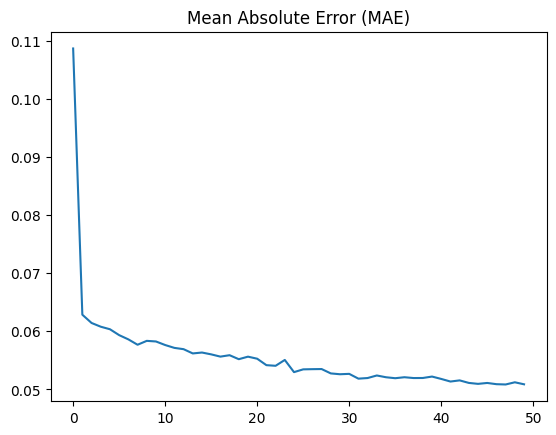

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(loss, label='MAE')
plt.title('Mean Absolute Error (MAE)')
plt.show()

In [ ]:
predictions = model.predict(x_test_seq)

18/18 [==============================] - 1s 7ms/step


In [ ]:
# mengembalikan data prediksi ke semula
predictions = scaler.inverse_transform(predictions)

In [ ]:
# mengembalikan nilai y_test
y_test_original = scaler.inverse_transform(y_test_seq)

In [ ]:
# menghitung MAE prediksi atau mean absolute eror dari testing
mae = np.mean(np.abs(predictions-y_test_original), axis=0)

In [ ]:
# iterasi untuk menampilkan MAE masing-masing fitur
for i, feature in enumerate(output_features):
  print("MAE untuk fitur ", feature, " : ", mae[i])

MAE untuk fitur  Tn  :  0.7297232870210029
MAE untuk fitur  Tx  :  0.7733095570063899
MAE untuk fitur  Tavg  :  0.6909224926880548
MAE untuk fitur  RH_avg  :  3.471152854793904
MAE untuk fitur  RR  :  16.90121103372064
MAE untuk fitur  ss  :  1.5238666962879879


In [ ]:
# menentukan batas, modelnya akurat atau tidak
threshold_mae_Tn = (df['Tn'].max() - df['Tn'].min()) * 10 / 100
print("threshold_mae_Tn : ", threshold_mae_Tn)

threshold_mae_Tn :  1.0


dapat di lihat bahwa threshold_mae_Tn = 1.0
apabila nilai MAE untuk fitur pada Tn kurang dari 1.0. maka model dapat dikatakan baik. karena MAE pada Tn kita 0.70 dan kurang dari 1.0. Maka model ini sudah cukup baik.

In [ ]:
threshold_mae_Tx = (df['Tx'].max() - df['Tx'].min()) * 10 / 100
threshold_mae_Tavg = (df['Tavg'].max() - df['Tavg'].min()) * 10 / 100
threshold_mae_RH_avg = (df['RH_avg'].max() - df['RH_avg'].min()) * 10 / 100
threshold_mae_RR = (df['RR'].max() - df['RR'].min()) * 10 / 100
threshold_mae_ss = (df['ss'].max() - df['ss'].min()) * 10 / 100

print("threshold_mae_Tx : ", threshold_mae_Tx)
print("threshold_mae_Tavg : ", threshold_mae_Tavg)
print("threshold_mae_RH_avg : ", threshold_mae_RH_avg)
print("threshold_mae_RR : ", threshold_mae_RR)
print("threshold_mae_ss : ", threshold_mae_ss)

threshold_mae_Tx :  3.58
threshold_mae_Tavg :  1.1799999999999997
threshold_mae_RH_avg :  5.6
threshold_mae_RR :  888.8
threshold_mae_ss :  1.55


Terlihat bahwa nilai semua MAE lebih kecil dari threshold masing-masing. Sehingga model sudah cukup dikatakan baik. 😀